# Project data exploration II -
## plotting categorical plot and incorporating other data

---


We will continue to work with the dataset that your group is consider for the term project. In this notebook we will create some plot using the Seaborn module and the different categorical plots we practiced in class. Additionally, we will explore the idea of working with other datasets in addition to the one you originally selected to strengthen your argument.

Group name:  

Created by NAMES (SJSU IDs):  Huy Tran(018235100), Michael Lac (017985071)

Last updated: DATE  

### Q1: How clean is your data?  
Do you have formatting concerns, null values, inconsistent data, etc... If so, explain what cleaning or reformating you have to do and how you plan to approach this cleaning steps.

In [15]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

# Download latest version
path = kagglehub.dataset_download("artyomkruglov/gaming-profiles-2025-steam-playstation-xbox")

print("Files in downloaded directory:")
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            print(os.path.join(root, file))

# Load the main dataset (adjust filename as needed)
# Assuming you want to load the players data from the steam directory as an example
df = pd.read_csv(os.path.join(path, 'steam', 'players.csv'))

print("=== Q1: Data Quality Assessment ===")
print(f"Dataset shape: {df.shape}")
print("\nBasic info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)

Files in downloaded directory:
/Users/lacmichael/.cache/kagglehub/datasets/artyomkruglov/gaming-profiles-2025-steam-playstation-xbox/versions/1/steam/purchased_games.csv
/Users/lacmichael/.cache/kagglehub/datasets/artyomkruglov/gaming-profiles-2025-steam-playstation-xbox/versions/1/steam/reviews.csv
/Users/lacmichael/.cache/kagglehub/datasets/artyomkruglov/gaming-profiles-2025-steam-playstation-xbox/versions/1/steam/history.csv
/Users/lacmichael/.cache/kagglehub/datasets/artyomkruglov/gaming-profiles-2025-steam-playstation-xbox/versions/1/steam/friends.csv
/Users/lacmichael/.cache/kagglehub/datasets/artyomkruglov/gaming-profiles-2025-steam-playstation-xbox/versions/1/steam/prices.csv
/Users/lacmichael/.cache/kagglehub/datasets/artyomkruglov/gaming-profiles-2025-steam-playstation-xbox/versions/1/steam/players.csv
/Users/lacmichael/.cache/kagglehub/datasets/artyomkruglov/gaming-profiles-2025-steam-playstation-xbox/versions/1/steam/games.csv
/Users/lacmichael/.cache/kagglehub/datasets/art

In [16]:
# Fill missing values in the 'country' column with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Verify that missing values in 'country' have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
playerid        0
country         0
created     47669
dtype: int64


### Q2: Create a categorical plot
Come up with a unique question that can be answer using a categorical plot from the sns module

Question: Which 10 countries have the most Steam Players?

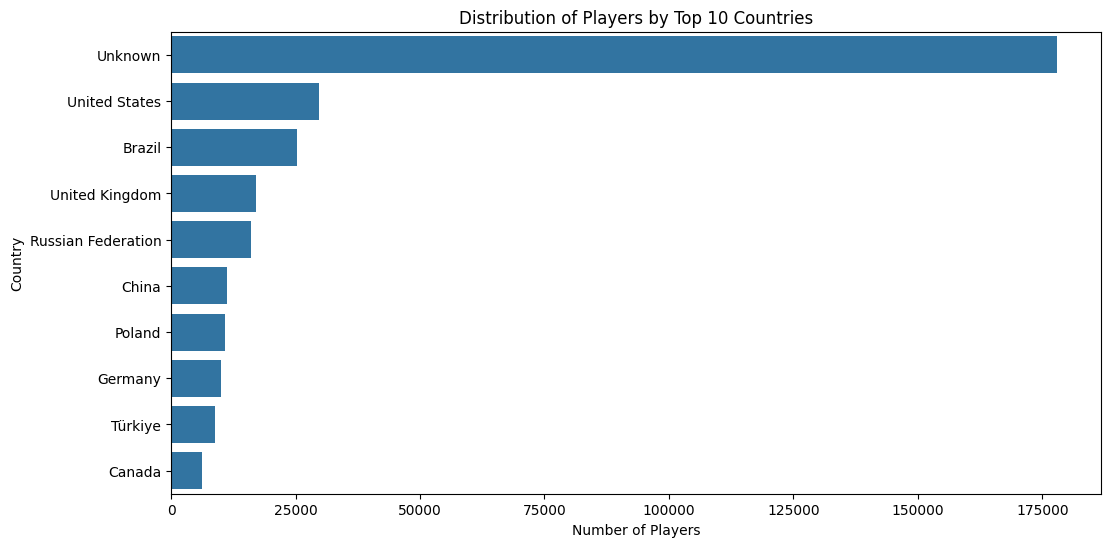

In [17]:
# Get the top 10 countries
top_10_countries = df['country'].value_counts().nlargest(10).index

# Create a count plot of the top 10 countries
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.countplot(data=df[df['country'].isin(top_10_countries)], y='country', order=top_10_countries)
plt.title('Distribution of Players by Top 10 Countries')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.show()

### Q3: Come up with a another unique question. This question must use map() or apply()

Question: Which years have the most account created?

In [18]:
# Convert the 'created' column to datetime objects, coercing errors to NaT
df['created'] = pd.to_datetime(df['created'], errors='coerce')

# Extract the year using apply() and create a new column 'creation_year'
df['creation_year'] = df['created'].apply(lambda x: x.year if pd.notnull(x) else np.nan)

# Display the first few rows with the new column and check data types
print(df[['created', 'creation_year']].head())
print("\nData types after extracting year:")
print(df[['created', 'creation_year']].dtypes)

              created  creation_year
0 2016-03-02 06:14:20         2016.0
1 2011-04-10 17:10:06         2011.0
2 2011-09-28 21:43:59         2011.0
3 2014-09-24 19:52:47         2014.0
4 2013-12-26 00:25:50         2013.0

Data types after extracting year:
created          datetime64[ns]
creation_year           float64
dtype: object


### Q4: Create an interactive plot
Create an interactive plot using plotly. Your plot can be a previously asked question or a new question, however explain how this interaction strengthen what you want to communicate with your audience.

In [19]:
# Drop rows with NaN in 'creation_year' for plotting
creation_year_data_plotly = df.dropna(subset=['creation_year'])

# Count the occurrences of each creation year
creation_year_counts = creation_year_data_plotly['creation_year'].value_counts().sort_index().reset_index()
creation_year_counts.columns = ['creation_year', 'count']

# Create an interactive bar plot using Plotly Express
fig = px.bar(creation_year_counts,
             x='creation_year',
             y='count',
             title='Interactive Distribution of Account Creation Years')

# Update x-axis to display years as integers
fig.update_layout(xaxis = dict(tickmode = 'linear'))

fig.show()

## Q5: Additional datasets and data processing
For the questions below you do not need to do the plotting if you have not found another complementary dataset. However, write the psuedocode of how you could go about answering the questions and sketches of what your visualization might be. Answer the following:

What additional datasets would you need to find or create to help strengthen your data?
How would you combine the dataset?
Do you need to reshape your data and how could you go about it?

In [ ]:
"""
=== Q5: Analyzing Gaming Preferences by Country (Theoretical) ===

Goal: Understand regional gaming patterns by combining our gaming data
with external geographic/demographic datasets.

ADDITIONAL DATASETS NEEDED:
1. Country demographics dataset (population, GDP, age distribution)
   - Source: World Bank API or UN data
   - Columns: country, population, gdp_per_capita, median_age, region
   
2. Geographic groupings dataset (to group countries by region/continent)
   - Source: Create manually or from ISO country data
   - Columns: country, continent, sub_region, latitude, longitude

PSEUDOCODE - HOW TO COMBINE DATASETS:
"""

# Step 1: Load the theoretical complementary dataset
# demographics_df = pd.read_csv('world_demographics.csv')
# Columns: ['country', 'population', 'gdp_per_capita', 'region', 'continent']

# Step 2: Merge our player data with demographic data
# player_demographics = df.merge(
#     demographics_df, 
#     left_on='country',  # our country column
#     right_on='country',  # their country column
#     how='left'
# )
# Result: Each player now has population, GDP, region info

# Step 3: Calculate gaming penetration rate per country
# players_per_country = df['country'].value_counts().reset_index()
# players_per_country.columns = ['country', 'player_count']
# 
# gaming_penetration = players_per_country.merge(demographics_df, on='country')
# gaming_penetration['penetration_rate'] = (
#     gaming_penetration['player_count'] / gaming_penetration['population'] * 100
# )
# Result: Percentage of population that games per country

"""
DATA RESHAPING NEEDED:
"""

# Reshape 1: Aggregate by region instead of individual countries
# regional_data = player_demographics.groupby('region').agg({
#     'playerid': 'count',           # Total players per region
#     'population': 'sum',            # Total population per region
#     'gdp_per_capita': 'mean'        # Average GDP per region
# }).reset_index()
# 
# Result: Transform from country-level to region-level data

# Reshape 2: Create pivot table for visualization
# gaming_by_region_year = player_demographics.pivot_table(
#     index='creation_year',
#     columns='region',
#     values='playerid',
#     aggfunc='count',
#     fill_value=0
# )
# 
# Result: Rows=years, Columns=regions, Values=number of new players
# This wide format is perfect for stacked area charts or heatmaps

"""
VISUALIZATION SKETCH:

Plot 1: Choropleth Map - Gaming Penetration Rate by Country
- World map colored by penetration_rate
- Darker colors = higher % of population that games
- Interactive tooltips showing country name, player count, population
Code structure:
    fig = px.choropleth(
        gaming_penetration,
        locations='country',
        locationmode='country names',
        color='penetration_rate',
        hover_data=['player_count', 'population'],
        color_continuous_scale='Viridis',
        title='Gaming Penetration Rate by Country'
    )

Plot 2: Scatter Plot - GDP vs Gaming Penetration
- X-axis: GDP per capita
- Y-axis: Gaming penetration rate
- Point size: Total player count
- Color: Region/continent
Code structure:
    fig = px.scatter(
        gaming_penetration,
        x='gdp_per_capita',
        y='penetration_rate',
        size='player_count',
        color='region',
        hover_name='country',
        title='Economic Correlation with Gaming Adoption'
    )

Plot 3: Stacked Area Chart - Regional Player Growth Over Time
- X-axis: Year
- Y-axis: Number of players
- Each region is a different colored layer in the stack
Code structure:
    fig = px.area(
        regional_yearly_data,
        x='creation_year',
        y='player_count',
        color='region',
        title='Regional Gaming Growth Over Time'
    )
"""

print("=== Q5 Summary ===")
print("\nAdditional datasets needed:")
print("- Country demographics (population, GDP, age) to normalize gaming metrics")
print("- Geographic groupings (regions, continents) for higher-level analysis")
print("\nHow to combine:")
print("- Use merge() with country as the key column")
print("- Calculate derived metrics like penetration rate")
print("\nData reshaping:")
print("- Aggregate from country-level to region-level using groupby()")
print("- Pivot from long format to wide format for time-series by region")
print("\nVisualization benefits:")
print("- Geographic maps show spatial patterns")
print("- Scatter plots reveal correlations (GDP vs gaming)")
print("- Stacked charts show regional growth trends over time")

=== Available Datasets ===
Players: (424683, 4)
Games: (98248, 7)
Purchased Games: (102548, 2)

=== Step 1: Combining Datasets ===
Player purchases combined: (102548, 5)


KeyError: "None of [Index(['appid', 'name'], dtype='object')] are in the [columns]"